In [5]:
# 1. Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# For preprocessing and modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [9]:
# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

In [25]:
# Load datasets from the 'DATASETS' folder
credit_df = pd.read_csv("DATASETS/customer credit details.csv")
info_df = pd.read_csv("DATASETS/customer info.csv")
profiles_df = pd.read_csv("DATASETS/customer profiles.csv")

In [27]:
# Display first few rows
credit_df.head()

,custid,debtinc,creddebt,othdebt,preloan
0,1,12.34,13.26,5.88,2
1,2,18.65,2.12,5.13,1
2,3,7.22,3.31,3.65,1
3,4,6.15,2.95,2.34,1
4,5,20.64,2.67,4.07,2


In [29]:
# Check the structure and basic info
print("Credit Details:")
credit_df.info()

print("\nCustomer Info:")
info_df.info()

print("\nCustomer Profiles:")
profiles_df.info()

Credit Details:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6993 entries, 0 to 6992
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   custid    6993 non-null   int64  
 1   debtinc   6992 non-null   float64
 2   creddebt  6993 non-null   float64
 3   othdebt   6993 non-null   object 
 4   preloan   6991 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 273.3+ KB

Customer Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6990 entries, 0 to 6989
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   custid   6990 non-null   int64
 1   veh      6990 non-null   int64
 2   house    6990 non-null   int64
 3   selfemp  6990 non-null   int64
 4   account  6990 non-null   int64
 5   deposit  6990 non-null   int64
 6   emp      6990 non-null   int64
 7   address  6990 non-null   int64
 8   branch   6990 non-null   int64
 9   ref      6990 non

In [31]:
# Check for missing values
print(credit_df.isnull().sum())
print(info_df.isnull().sum())
print(profiles_df.isnull().sum())

custid      0
debtinc     1
creddebt    0
othdebt     0
preloan     2
dtype: int64
custid     0
veh        0
house      0
selfemp    0
account    0
deposit    0
emp        0
address    0
branch     0
ref        0
dtype: int64
custid    0
age       0
gender    0
ms        0
child     0
zone      0
bad       0
dtype: int64


In [33]:
# Summary statistics
credit_df.describe()

,custid,debtinc,creddebt
count,6993.000000,6992.000000,6993.000000
mean,3494.070356,12.753042,3.036335
std,2018.733467,6.988344,2.283054
min,1.000000,0.660000,0.040000
25%,1746.000000,7.520000,1.690000
50%,3494.000000,11.310000,2.630000
75%,5242.000000,16.772500,3.690000
max,6990.000000,45.330000,22.490000


In [37]:
print(credit_df.columns)


Index(['custid', 'debtinc', 'creddebt', 'othdebt', 'preloan'], dtype='object')


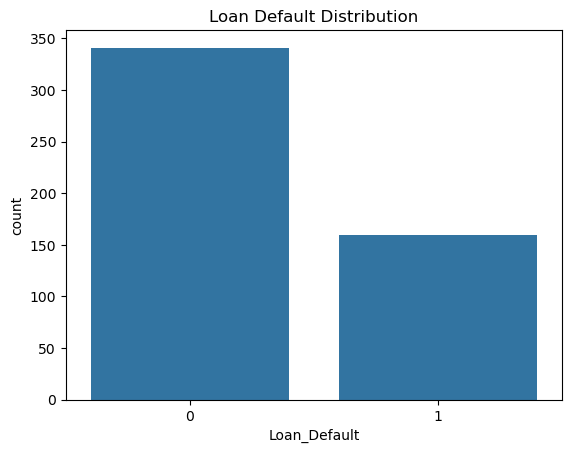

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

credit_df = pd.read_csv('credit_data.csv')

sns.countplot(data=credit_df, x='Loan_Default')
plt.title("Loan Default Distribution")
plt.show()

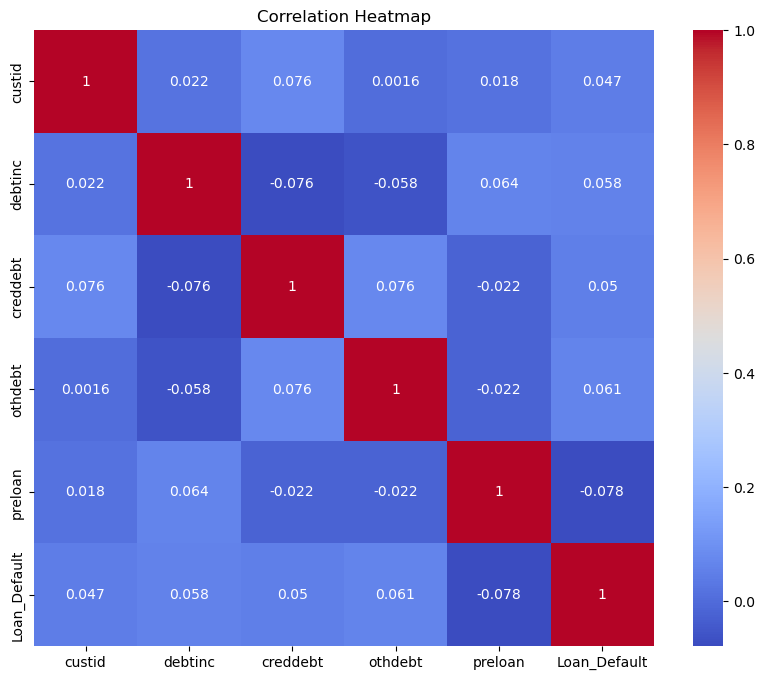

In [45]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(credit_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [49]:
print("credit_df columns:", credit_df.columns)
print("info_df columns:", info_df.columns)
print("profiles_df columns:", profiles_df.columns)

credit_df columns: Index(['custid', 'debtinc', 'creddebt', 'othdebt', 'preloan', 'Loan_Default'], dtype='object')
info_df columns: Index(['custid', 'veh', 'house', 'selfemp', 'account', 'deposit', 'emp',
       'address', 'branch', 'ref'],
      dtype='object')
profiles_df columns: Index(['custid', 'age', 'gender', 'ms', 'child', 'zone', 'bad'], dtype='object')


In [51]:
# Merge datasets if needed (assuming a common key like Customer_ID)
merged_df = credit_df.merge(info_df, on="custid").merge(profiles_df, on="custid")


In [53]:
# Encode categorical variables
categorical_cols = merged_df.select_dtypes(include='object').columns

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    merged_df[col] = le.fit_transform(merged_df[col].astype(str))
    label_encoders[col] = le

In [55]:
# Fill missing values with median
merged_df.fillna(merged_df.median(), inplace=True)


In [61]:
# Define features and target
X = merged_df.drop(columns=["Loan_Default", "custid"])
y = merged_df["Loan_Default"]


In [63]:
# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [67]:
# Logistic Regression model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)

In [69]:
# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.97      0.78        65
           1       0.50      0.06      0.10        35

    accuracy                           0.65       100
   macro avg       0.58      0.51      0.44       100
weighted avg       0.60      0.65      0.54       100

Confusion Matrix:
 [[63  2]
 [33  2]]


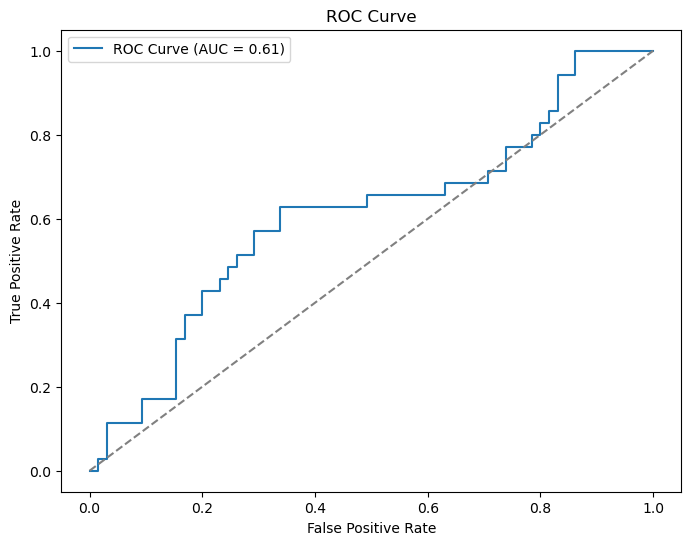

In [71]:
# ROC Curve
y_proba = log_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_proba):.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [73]:
# Try Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print("Random Forest Report:\n", classification_report(y_test, rf_pred))

Random Forest Report:
               precision    recall  f1-score   support

           0       0.64      0.92      0.75        65
           1       0.17      0.03      0.05        35

    accuracy                           0.61       100
   macro avg       0.40      0.48      0.40       100
weighted avg       0.47      0.61      0.51       100

